# 직접 만들어본 머신러닝 알고리즘

- 머신러닝 알고리즘을 완벽하게 이해하기 위하여 학교수업 혹은 구글링을 바탕으로 관련 수식을 이해하고 알고리즘을 만들어 보았다.
- sikit-learn 모듈처럼 class 안에 fit, predict, score 함수를 넣어 구현하였다.
- fit(X_train, y_train) : train data를 적합시키고 모델을 만든다.
- predict(X_test) : 분류기일 경우, 예측 특성값이 들어있는 벡터를 반환한다.
- score(X_test, y_test) : 정답레이블과 예측레이블을 비교하여 정확도를 반환한다.

## KNN(K-Nearest Neighbor) 회귀

### 1. 알고리즘

In [1]:
import numpy as np
import pandas as pd

class k_neighbors_regressor:
    
    def __init__(self, k = 3): # k-최근접 이웃수를 설정할 수 있다. 디폴트 값은 3이다.
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        self.X_test = X_test 
        y_pred_list = []
        
        for test_point in X_test:
            dist_square_list = [] # test point로부터 train point와의 거리 리스트
            
            for train_point in self.X_train:
                diff_vector = test_point - train_point
                dist_square = np.dot(diff_vector, diff_vector)
                dist_square_list.append(dist_square)
                
            dist_square_df  = pd.DataFrame({'y_value' : self.y_train,
                                            'dist_square' : dist_square_list})
            dist_square_df = dist_square_df.sort_values('dist_square')
            y_pred_list.append(np.mean(dist_square_df['y_value'][: self.k + 1])) # 특성의 y값의 평균값
        
        return y_pred_list

### 2. 검증

In [4]:
import matplotlib.pyplot as plt
from mglearn.datasets import make_wave
from sklearn.model_selection import train_test_split

X, y = make_wave(n_samples = 500)

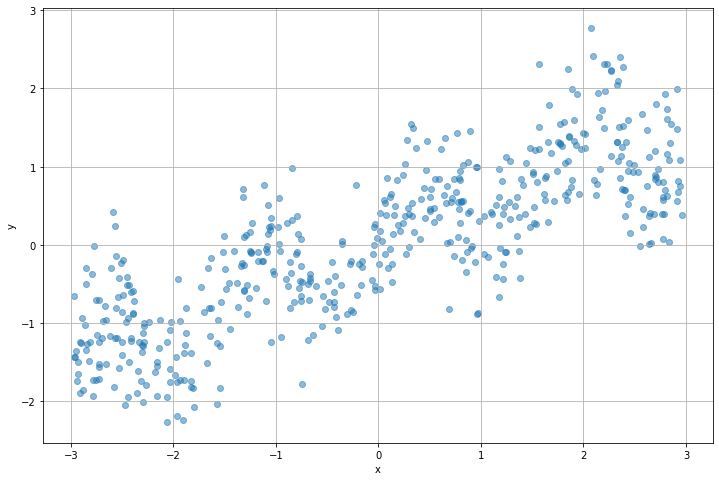

In [7]:
plt.figure(figsize = (12, 8))
plt.scatter(X, y, alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

- 위와 같은 데이터 셋을 머신러닝 모델을 이용하여 예측하고자 한다.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
knn = k_neighbors_regressor() # 위에서 만든 지도학습 알고리즘
knn.fit(X_train, y_train) # train data 적합
y_pred = knn.predict(X_test) # 예측 레이블 반환

- 그래프를 통해 확인해보도록 하자

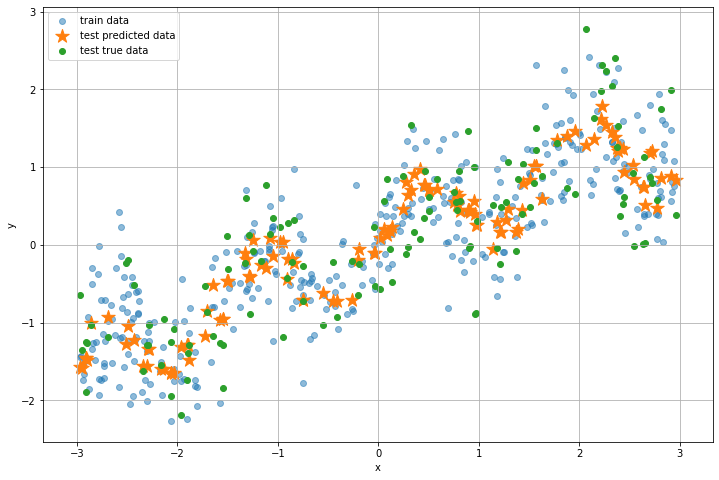

In [13]:
plt.figure(figsize = (12, 8))
plt.scatter(X_train, y_train, alpha = 0.5, label = 'train data')
plt.scatter(X_test, y_pred, marker = '*', s = 200, label = 'test predicted data' )
plt.scatter(X_test, y_test, label = 'test true data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

- 예측데이터가 실제 데이터와 일치율이 높다고 볼 순 없지만 예측데이터는 훈련데이터의 흐름을 잘 따르는 것으로 보인다.
- 비모수적 예측방법이므로 선형성이지 않은 복잡한 형태의 데이터에 잘 적합될 모델로 판단된다.